# Py Learn Data Course

## Configuration

### Install requirements

In [1]:
# ! pip install pyarrow
# ! pip install --upgrade pandas
# ! pip install pandas==2.0.3

In [1]:
import pandas as pd
print(pd.__version__)


2.0.3


### Importing requirements

In [2]:
from pathlib import Path


import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

### Download file

#### Pythonic way

In [5]:
import requests
zip_file = 'python-panama-real-estate.zip'

file_url = f'https://raw.githubusercontent.com/pythonpanama//pylearn-data-101//master/course_data/{zip_file}'
print(file_url)
def download_file2(url):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                # If you have chunk encoded response uncomment if
                # and set chunk_size parameter to None.
                #if chunk: 
                f.write(chunk)

    return Path(local_filename)

local_zip_file = download_file2(file_url)
print(f'Local zip: {local_zip_file.absolute()}')b

https://raw.githubusercontent.com/pythonpanama//pylearn-data-101//master/course_data/python-panama-real-estate.zip
Local zip: /home/luiscberrocal/adelantos/pylearn-data-101/notebooks/python-panama-real-estate.zip


In [ ]:
import zipfile

with zipfile.ZipFile(local_zip_file, 'r') as zip:
    zip.extractall()

local_zip_file.unlink()

#### Via OS

In [6]:
# ! wget https://raw.githubusercontent.com/pythonpanama//pylearn-data-101/master/course_data/python-panama-real-estate.zip

In [ ]:
# ! unzip python-panama-real-estate.zip

# Metas

Qué queremos?

Los datos que tenemos sirven para responder lo que queremos?

Queremos encontrar una vivienda para 4 personas y nuestro presupuesto es 500,000 +/- 10%. Dos adultos y dos menores de edad lo que implica al menos dos recamaras.

Se desea encontrar las 10 viviendas con mejor precio por metro cuadrado.




## Setting common variables

In [4]:
local = True
    
if local:
    data_folder = Path().cwd().parent / 'data' / 'house_pricing'

    csv_file = data_folder / 'python-panama-real-estate.csv'

    print(f'Folder {data_folder} existe: {data_folder.exists()}')
    print(f'CSv file: {csv_file.name}')
else:
    csv_file = Path('python-panama-real-estate.csv')

    print(f'CSv file: {csv_file.name}')

Folder /home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing existe: True
CSv file: python-panama-real-estate.csv


## Loading data

### Normal load

In [5]:
df = pd.read_csv(csv_file)

Notice:
- Dtypes
- Memory usage


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   status                    733159 non-null  object 
 1   price                     733088 non-null  float64
 2   bed                       617177 non-null  float64
 3   bath                      621407 non-null  float64
 4   Lot area (acres)          572378 non-null  float64
 5   Full Address              733159 non-null  object 
 6   street                    732069 non-null  object 
 7   city                      733087 non-null  object 
 8   state                     705907 non-null  object 
 9   Zip code                  732957 non-null  float64
 10  House size (square feet)  520772 non-null  float64
 11  sold_date                 347237 non-null  object 
 12  shootings_count           293781 non-null  float64
 13  bath_tub                  0 non-null       f

### Pyarrow load

Aqui solo hice el ajuste

In [7]:
df = pd.read_csv(csv_file, engine='pyarrow', dtype_backend='pyarrow')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  string[pyarrow]     
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  string[pyarrow]     
 8   state                     733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  double[pyarrow]     
 10  House size (square feet)  520772 non-null  double[pyarro

### Setting categories

Impacto en la memoria al usar categorias.

In [9]:
df['city'] = df['city'].astype('category')

# df['state'] = df['state'].astype('category')
df['Zip code'] = df['Zip code'].astype('category')
df['status'] = df['status'].astype('category')

#### State category hormework

In [10]:
# Do categoyry state

In [11]:
df['status'].value_counts()

status
for_sale          731566
ready_to_build      1593
Name: count, dtype: int64

 Note:
 
 Memory usage is 20 MB less

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  category            
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  category            
 8   state                     733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  category            
 10  House size (square feet)  520772 non-null  double[pyarro

## Exploración de datos

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  category            
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  category            
 8   state                     733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  category            
 10  House size (square feet)  520772 non-null  double[pyarro

### Shape

In [14]:
print(f'Filas {df.shape[0]:,} Columnas: {df.shape[1]}')

original_row_count = df.shape[0]

Filas 733,159 Columnas: 14


### Head

In [15]:
df.head()

,status,price,bed,bath,Lot area (acres),Full Address,street,city,state,Zip code,House size (square feet),sold_date,shootings_count,bath_tub
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,,601.0,920.0,<NA>,<NA>,<NA>
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,,601.0,1527.0,<NA>,<NA>,<NA>
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,,795.0,748.0,<NA>,<NA>,<NA>
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,,731.0,1800.0,<NA>,<NA>,<NA>
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,,680.0,<NA>,<NA>,<NA>,<NA>


### Describe

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [17]:
df.describe()

,price,bed,bath,Lot area (acres),House size (square feet),sold_date,shootings_count
count,733088.00,617177.00,621407.00,572378.00,520772.00,347237,293781.00
mean,725701.66,3.42,2.54,19.06,2192.53,2008-11-08,4.79
min,0.00,1.00,1.00,0.00,100.00,1901-01-01,1.00
25%,237500.00,2.00,2.00,0.14,1195.00,2002-08-26,1.00
50%,419000.00,3.00,2.00,0.35,1714.00,2009-07-22,3.00
75%,725000.00,4.00,3.00,1.38,2547.25,2017-10-12,7.00
max,875000000.00,123.00,198.00,100000.00,1450112.00,2023-03-01,36.00
std,1768768.91,2.03,2.00,1022.01,3141.46,NaN,5.37


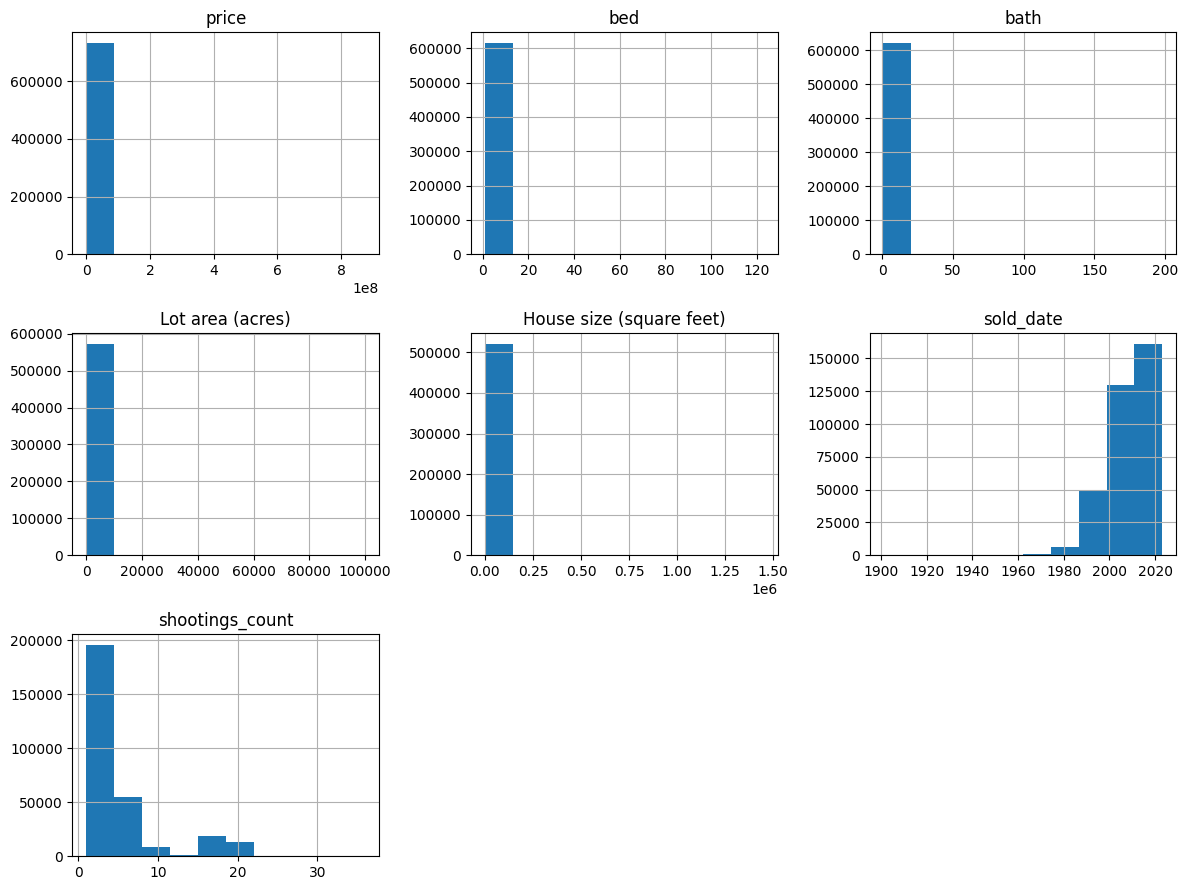

In [18]:
df.hist(figsize=(12, 9))
plt.tight_layout()
plt.show()

### Histogramas

<Axes: >

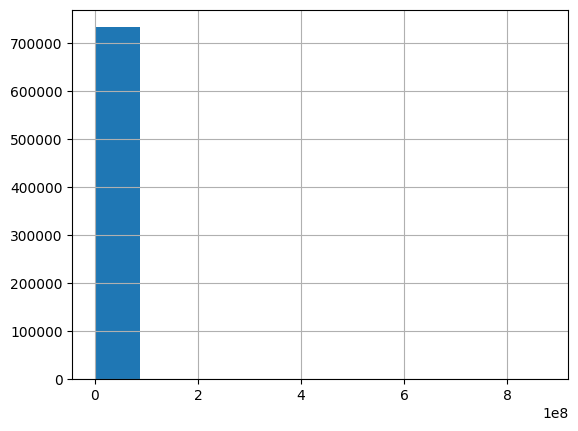

In [19]:
df['price'].hist(bins=10)

<Axes: >

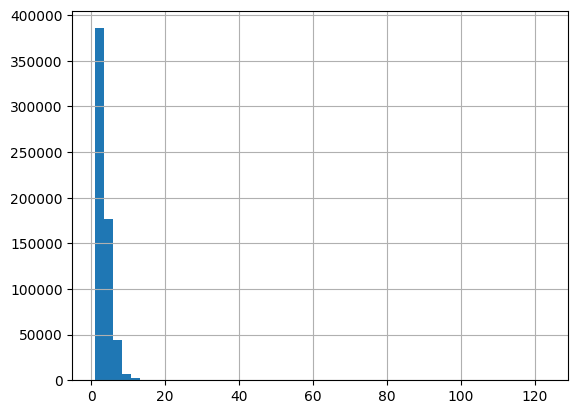

In [20]:
df['bed'].hist(bins=50)

### Valores Nulos

In [21]:
df.isna().sum()

status                           0
price                           71
bed                         115982
bath                        111752
Lot area (acres)            160781
Full Address                     0
street                           0
city                             0
state                            0
Zip code                       202
House size (square feet)    212387
sold_date                   385922
shootings_count             439378
bath_tub                    733159
dtype: int64

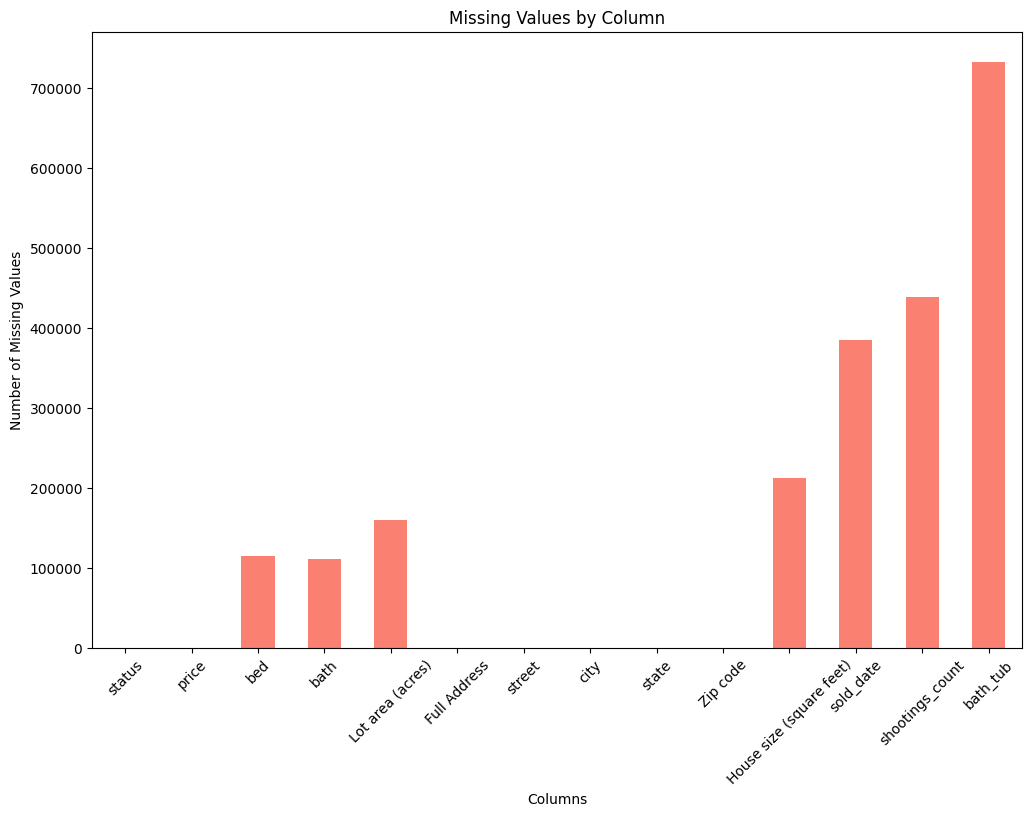

In [22]:
# Calculate missing values
missing_data = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(12, 8))
missing_data.plot(kind='bar', color='salmon')
plt.title('Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


**Aqui quedmos Sabado 9 de septiembre**

## Limpieza de datos

In [23]:
def calculate_outliers(df: pd.DataFrame, field_name:str) -> float:
    mean = df[field_name].mean()
    std = df[field_name].std()

    print(f'{field_name} Promedio: {mean:,.2f} Desviacion standard {std:,.2f}')
    outliers = mean + 3 * std
    return outliers

### Renombrando columnas

Porqué?
- Estandarización
- Caracteres especiales
- Uso de la notacion .

In [24]:
print(f'Price max: {df.price.max():,}')

Price max: 875,000,000.0


In [25]:
column_dict = {
  "Lot area (acres)": "area_acres",
  "Full Address": 'full_address'
  "Zip code": "zip_code",
  "House size (square feet)": 'house_area_square_feet',
}

SyntaxError: invalid syntax (1436431024.py, line 4)

In [ ]:
## TAREA
column_dict_home_work = {
  "Lot area (acres)": "area_in_acres",
  "Full Address": 'full_address',
  "Zip code": "state_zip_code",
  "House size (square feet)": 'house_area_ft2',
}

In [ ]:
df = df.rename(columns=column_dict)

In [ ]:
df.info()

### Eliminando los valores nulos


1. **Imputation**: Replace missing values with the mean, median, or mode of the column.
2. **Drop**: Remove rows with missing values. This approach will reduce our dataset size, which might not be ideal, especially if a large portion of the data is affected.
3. **Predictive Imputation**: Use machine learning models to predict and fill in missing values. This approach is more complex and might be overkill for our current analysis.

#### Usando dropna

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna(subset=['price', 'house_area_square_feet', 'area_acres', 'bed', 'bath'])

In [ ]:
df.shape

print(f'Filas: {df.shape[0]:,} Porcentaje datos eliminados: {1-df.shape[0]/original_row_count:%}')

#### Imputando values


Out of scope

### Camas

In [ ]:
bed_mean = df['bed'].mean()
bed_std = df['bed'].std()

print(f'Promedio: {bed_mean:.2f} Desviacion standard {bed_std:.2f}')
outliers = bed_mean + 3 * bed_std

print(f'Outliers: +/- {outliers:.2f}')

In [ ]:
beds = df.loc[df['bed'] >= outliers]

print(beds.shape)

In [ ]:
beds['bed'].describe()

In [ ]:
df = df.drop(beds.index)

In [ ]:
df['bed'].hist(bins=10)

### Banos

In [ ]:
df['bath'].describe()

In [ ]:
bath_mean = df['bath'].mean()
bath_std = df['bath'].std()

print(f'Promedio: {bath_mean:.2f} Desviacion standard {bath_std:.2f}')
bath_outliers = bath_mean + 3 * bath_std

print(f'Outliers: +/- {bath_outliers:.2f}')

In [ ]:
baths = df.loc[df['bath'] >= outliers]

print(baths.shape)

In [ ]:
baths['bath'].describe()

In [ ]:
df = df.drop(baths.index)

In [ ]:
df['bath'].hist(bins=9)

### Precio

In [ ]:
df['price'].describe()

In [ ]:
price_mean = df['price'].mean()
price_std = df['price'].std()

print(f'Promedio: {price_mean:,.2f} Desviacion standard {price_std:,.2f}')
price_outliers = price_mean + 3 * price_std

print(f'Outliers: +/- {price_outliers:,.2f}')

In [ ]:
extreme = df.loc[df['price'] >= price_outliers]

extreme.shape

In [ ]:
df = df.drop(extreme.index)

df.shape

In [ ]:
df['price'].hist(bins=20)

### Direcciones repetidas

In [ ]:

df.duplicated(subset=['full_address']).sum()

In [ ]:
df = df.sort_values(by='full_address')
df = df.drop_duplicates(keep='last', subset=['full_address'])

In [ ]:
df.shape

### Nuevos campos

#### Area en metros cuadrados

In [ ]:
df['house_size_m2'] = df['house_area_square_feet'] * 0.092903
df['lot_size_m2'] = df['area_acres'] * 4046.86

In [ ]:
df['house_size_m2'].describe()

In [ ]:
o = calculate_outliers(df, 'house_size_m2')

print(f'Outliers +/- {o:,.2f}')

In [ ]:
df['lot_size_m2'].describe()

#### Precio por metro cuadrado

In [ ]:
df['price_x_m2'] = df['price'] / df['house_size_m2']

In [ ]:
o = calculate_outliers(df, 'price_x_m2')

print(f'Outliers +/- {o:,.2f}')

In [ ]:
extreme_price_x_m2 = df.loc[df['price_x_m2'] >= o/3]

print(extreme_price_x_m2.shape)

In [ ]:
df = df.drop(extreme_price_x_m2.index)

In [ ]:
df.shape

In [ ]:
df['price_x_m2'].hist(bins=12)

In [ ]:
df.isna().sum()

## EDA

### Precio


In [ ]:
sns.scatterplot(data=df, x="house_size_m2", y="price")

### Limpieza de area


In [ ]:
o = calculate_outliers(df, 'house_size_m2')

print(f'Outliers +/- {o:,.2f}')

In [ ]:
area_extreme = df.loc[df['house_size_m2'] >= o]

print(area_extreme.shape)

In [ ]:
df = df.drop(area_extreme.index)

In [ ]:
sns.scatterplot(data=df, x="house_size_m2", y="price", hue='state')

## Distribucion por estado

In [ ]:
df['state'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='state', color='steelblue', ax=ax)
ax.set_title(f'Cantidad por Estado')

In [ ]:

sns.barplot(data=df, x="state", y="price_x_m2")

In [ ]:
ga = df.loc[df['state'] == '']

ga.shape

In [ ]:
m = ga['price_x_m2'].mean()

print(f'Promedio {m}')

In [ ]:
rango = 3e6


In [ ]:
df.shape

## Analisis

In [ ]:
base_price =  550_000
range_value = 0.10
min_price = base_price * (1 - range_value)
max_price = base_price * (1 + range_value)
print(min_price, max_price)

condition = (df['price'] <= max_price) & (df['price'] >= min_price) & (df['bed'] >= 3) & (df['bath'] >= 2)


condition = (df['price'] <= max_price) & (df['price'] >= min_price) & (df['bed'] >= 3) & (df['bed'] <= 5) & (df['bath'] >= 2)
fdf = df.loc[condition].copy()

In [ ]:
fdf.shape

In [ ]:
fdf['price'].describe()

### Cantidad por estado

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=fdf, x='state', color='steelblue', ax=ax)
ax.set_title(f'Cantidad por Estado')

for rect in ax.patches:
  x_position =  int(rect.get_x() + rect.get_width() / 2)
  y_position = rect.get_height()+ 1
  display_value = f'{int(rect.get_height()):,}'
  ax.text(x_position ,y_position, display_value,horizontalalignment='center', fontsize = 11)

### Precio por metro cuadrado


In [ ]:
fdf['price_x_m2'].hist()

#### Box plots

In [ ]:
sns.boxplot(data=fdf, x="price_x_m2", y="state")

In [ ]:
print(df['price_x_m2'].median())
sns.boxplot(data=fdf, x="price_x_m2")

In [ ]:
sns.scatterplot(data=fdf, x="house_size_m2", y="price_x_m2")

### Shootings

In [ ]:
fdf['shootings_count'].hist()

In [ ]:
sns.boxplot(data=fdf, x="shootings_count", y="state")

## Ecuacion

Puntos = 3 * price_x_m2 + 3 * house_size_m2 + 2 * lot_size_m2 + bed + bath

psqm area lot beds bathrooms



In [ ]:
fdf.info()

In [ ]:
fdf['price_x_m2_v'] = (fdf['price_x_m2'] - fdf['price_x_m2'].mean())/ fdf['price_x_m2'].std()

In [ ]:
fdf['price_x_m2_v'].describe()

### Escalando los valores


\begin{align}
  x_{\text{scaled}} = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{align}


In [ ]:
fdf['psqm'] =  (fdf['price_x_m2'] - fdf['price_x_m2'].min())/(fdf['price_x_m2'].max() - fdf['price_x_m2'].min())
fdf['area'] =  (fdf['house_size_m2'] - fdf['house_size_m2'].min())/(fdf['house_size_m2'].max() - fdf['house_size_m2'].min())
fdf['lot'] =  (fdf['lot_size_m2'] - fdf['lot_size_m2'].min())/(fdf['lot_size_m2'].max() - fdf['lot_size_m2'].min())
fdf['beds'] =  (fdf['bed'] - fdf['bed'].min())/(fdf['bed'].max() - fdf['bed'].min())
fdf['bathrooms'] =  (fdf['bath'] - fdf['bath'].min())/(fdf['bath'].max() - fdf['bath'].min())

### Explicacion de la ecuacion


\begin{align}
  value_{i} = 2PSQM + 3Area + 2lot + beds + bathrooms
\end{align}

In [ ]:
fdf['value'] = 3 * fdf['psqm'] + 3 * fdf['area'] + 2 * fdf['lot'] + fdf[a'beds'] +  fdf['bathrooms']

In [ ]:
fdf['value'] = 3 * fdf['psqm'] + 3 * fdf['area'] + 2 * fdf['lot'] + fdf['beds'] +  fdf['bathrooms']

In [ ]:
fdf['value'].describe()

In [ ]:
fdf['value'].hist()

In [ ]:
sns.boxplot(data=fdf, x="value")

In [ ]:
sns.boxplot(data=fdf, x="value", y="state")

In [ ]:
fdf = fdf.sort_values(by=['value'], ascending=False)

fdf.head(10)

In [ ]:
fdf['full_address'].duplicated(keep='last').sum()

In [ ]:
fdf.shape

In [ ]:
cols = ['price', 'value', 'price_x_m2', 'house_size_m2', 'lot_size_m2', 'bed', 'bath']
df2 = fdf[cols]

df2.head(10)